In [1]:
import matplotlib.pyplot as plt
import numpy as np

from pyqupath.geojson import GeojsonProcessor
from pyqupath.tiff import TiffZarrReader
from pyqupath.tma import plot_contours, tma_dearrayer

/opt/miniforge3/envs/pyqupath_3.10/lib/python3.10/site-packages/tqdm_joblib/__init__.py:4: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


# 00. Preparation

In [2]:
img_path = "/mnt/nfs/storage/HBV-HCC/CODEX-images/formal/first_run/HCC_batch2_VICTORY_TMA_JAN1A2023_0.er.qptiff"
reader = TiffZarrReader.from_qptiff(img_path)
img_dapi = reader.zimg_dict["DAPI"][:, :]  # Load the whole image in memory

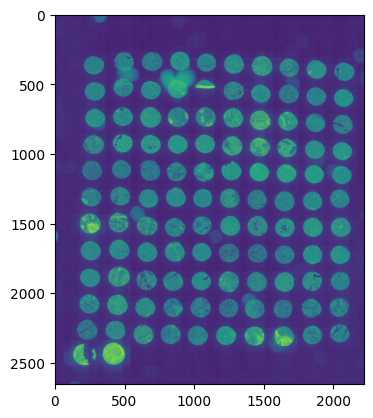

In [3]:
plt.imshow(np.log1p(img_dapi[::16, ::16]))

# 01. TMA dearrayer

In [4]:
gdf_filtered, merge_list, gdf_merge, overlap_list, gdf_circle = tma_dearrayer(
    img_dapi,
    downsample_step=16,
    kernel_radius=5,
    area_threshold=1000,
    radius_expand=5,
    merge_list=None,  # Set to None to find overlaps automatically
)

Found 1 groups to merge:
    Group 1: (0, 14)
Found 0 overlapping circles:


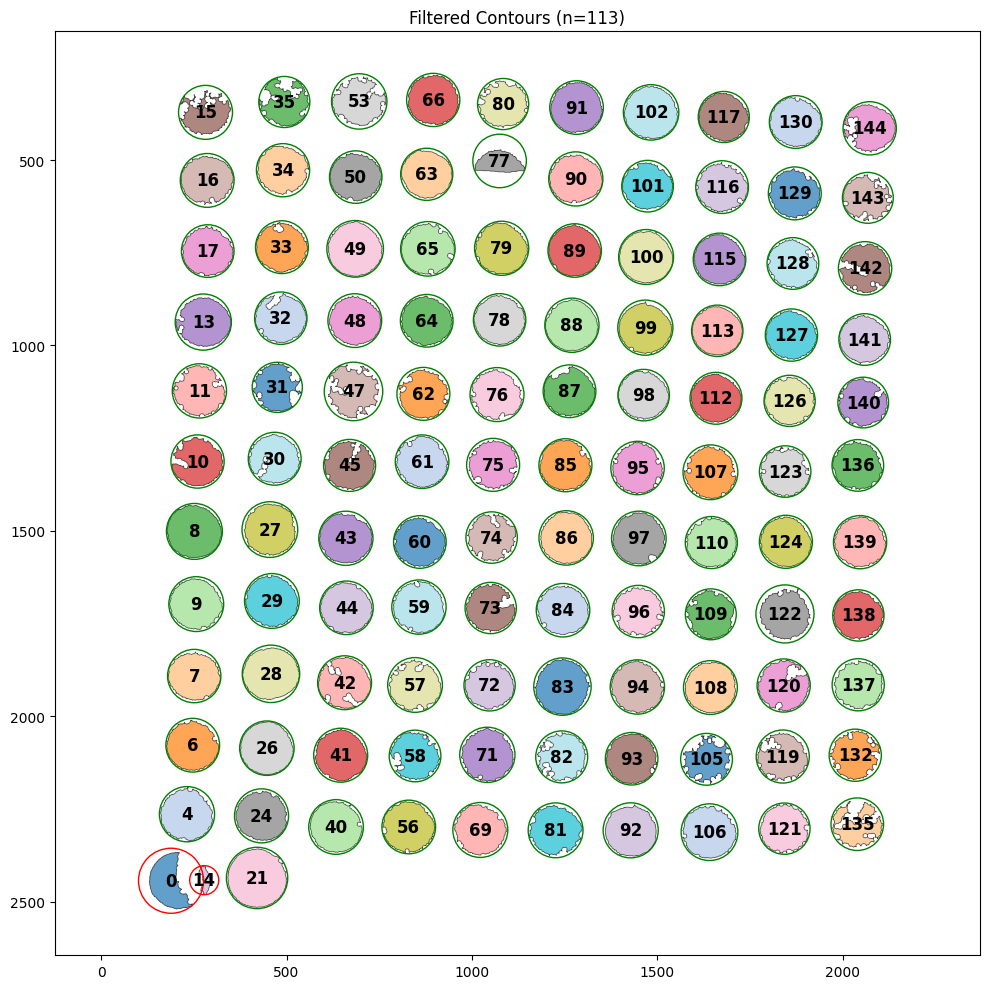

In [5]:
# View cores to merge
fig, ax = plot_contours(gdf_filtered, merge_list=merge_list)
fig.show()

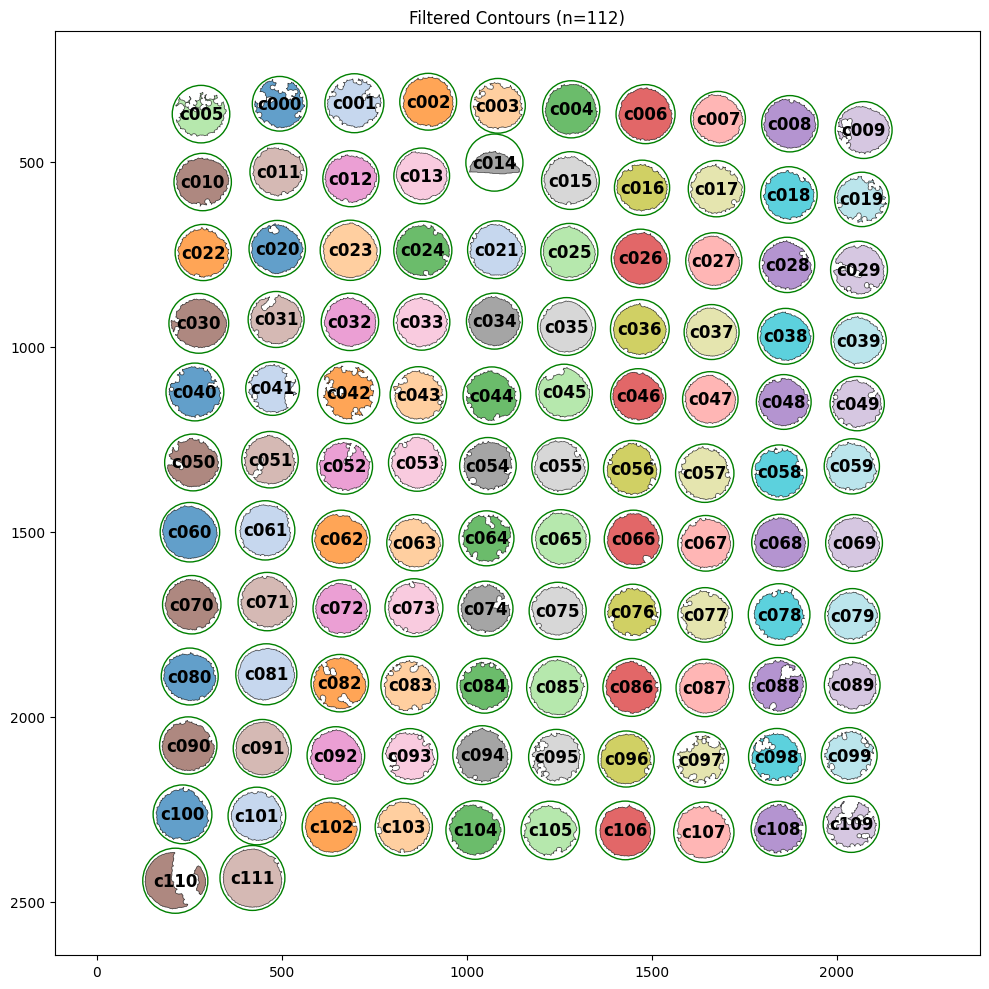

In [6]:
# View final merged cores
fig, ax = plot_contours(gdf_merge, merge_list=overlap_list)
fig.show()

# 02. Cropping

In [7]:
gp = GeojsonProcessor(gdf_circle)

Skipped 0 geometries: 


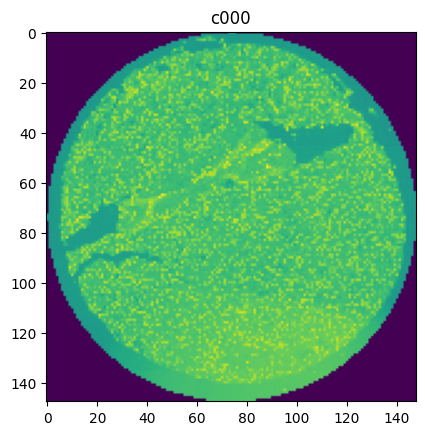

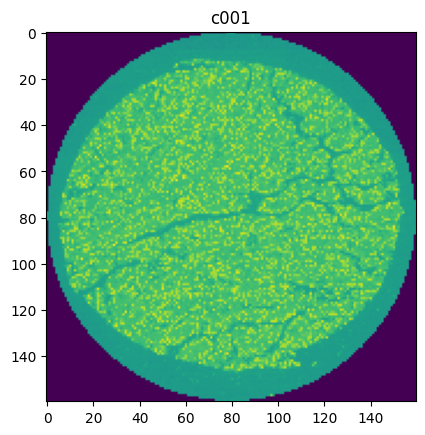

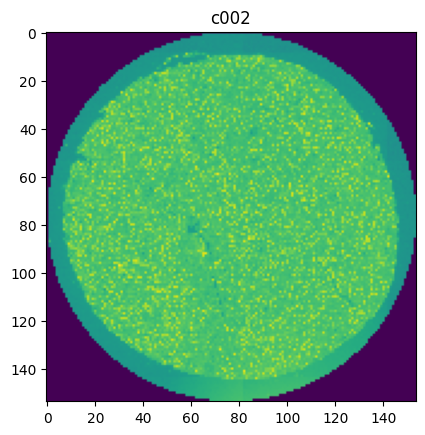

In [8]:
i = 0
for name, img_dict_crop in gp.crop_dict_by_polygons(reader.zimg_dict):
    img_crop = img_dict_crop["DAPI"][:, :]
    plt.imshow(np.log1p(img_crop[::16, ::16]))
    plt.title(name)
    plt.show()

    i += 1
    if i == 3:
        break